***

### **Importante** 


- **Realice varios comentarios haciendo uso de una etiqueta html para darle color al comentario. Sin embargo, al subir mis notebooks a GITHUB las secciones donde realice los comentarios a color aparecen en blanco.**  

- **El "Enable Scrolling for Outputs" no se respeta al subir este contenido a GITHUB, por lo tanto, la impresión de los datos puede ser larga.**  

**Lo anterior no afecta en absoluto el contenido principal y el funcionamiento del documento, por lo que, si lo deseas, lo puedes ejecutar sin ningún problema en tu ordenador.**

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

Para las entradas hemos hecho uso de un semáforo hipotético de 3 luces. Cada fila representa un patrón de luces en el semáforo que a su vez esta asociado con una salida (avanzar_parar). Por otro lado, cada columna representa una luz.

In [100]:
Semaforo = np.array([[1,0,1],[0,1,1],[0,0,1],[1,1,1],[0,1,1],[1,0,1],]) # Entradas.
Semaforo

array([[1, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [0, 1, 1],
       [1, 0, 1]])

In [136]:
avanzar_parar = np.array([0,1,0,1,1,0]) # Etiquetas o Salidas Deseadas. 1 significa avanzar y 0 significa parar.
avanzar_parar.T

array([0, 1, 0, 1, 1, 0])

Lo que se desea que realice nuestra red neuronal es que asocie de manera correcta las entradas (semáforo), con sus respectivas etiquetas (avanzar_parar). **En otras palabras, la red neuronal busca la correlación que existe entre cada entrada y la salida.**

Un esquema general de representación de la red neuronal es el siguiente:

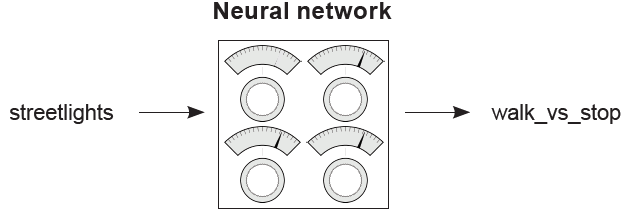

In [137]:
Red_Neuronal_Esquema = Image.open("streetlights_RN_representacion.PNG").convert("RGB")
Red_Neuronal_Esquema

La arquitectura de esta red neuronal será la siguiente:  

- 3 neuronas de entrada y 1 neurona de salida. Recordemos que aún no estamos haciendo uso de funciones de activación ni de bias.

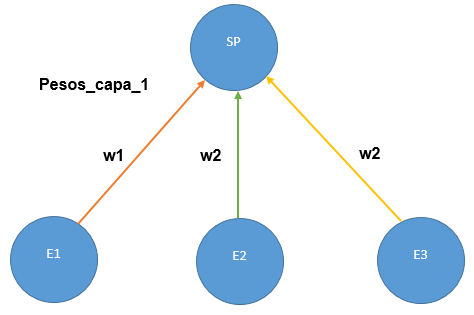

In [3]:
Red_2_Capas = Image.open("Red_2_Capas.PNG").convert("RGB")
Red_2_Capas

Comencemos con el código:

In [148]:
def generador (x):
    """Esta función es un generador. Nos arroja el siguiente número cada que este es solicitado, lo que se traduce en un
    aprovechamiento correcto y eficaz de la memoria RAM. Por otro lado, cuando se hacen usos de listas, estas generan todo
    el conjunto de datos y lo cargan en memoria, lo que provoca que cuando una lista con una gran cantidad de elementos se
    crea, esta consuma gran cantidad de memoria RAM."""
    
    for i in range(x):
        
        yield i

def algoritmo_entrenamiento (entradas, salidas_deseadas, pesos, alfa, epocas):
    """Esta función se encarga de ejecutar el algoritmo de entrenamiento de nuestra red neuronal."""
    
    pesos_ = pesos.copy() # Copiamos los pesos a una nueva variable para evitar apuntar al mismo objeto y que nuestros pesos originales se modifiquen.
    
    error_deseado = float(input("\nHola ¿Cuál es el error que mínimo que deseas para la red neuronal?: "))
    
    error_red = list()
    
    for epoca in generador(epocas):
        
        predicciones = list()
        error_x_entrada = 0
        
        for entrada, salida_deseada in zip(entradas, salidas_deseadas.T):
            
            prediccion = entrada.dot(pesos_) # Se lleva a cabo el producto punto, es decir, la predicción.
            predicciones.append(prediccion)
            
            # El error a usarse sigue siendo el Error Cuadrático (EC):
            error = (prediccion - salida_deseada)**2
            error_x_entrada += error # Sumamos los errores en la red correspondientes a la predicción de cada entrada.
            
            # Descenso del Gradiente:
            delta = 2*(prediccion - salida_deseada)*1 # Dado que sólo tengo una neurona de salida, sólo habrá un delta.
            pesos_delta = delta * entrada
            
            # Actualización de pesos:
            pesos_ -= alfa*pesos_delta
            
        error_x_epoca = (error_x_entrada/len(entradas))*100 # ECM dado en porcentaje en D. Entrenamiento.
        error_red.append(error_x_epoca)
        print(f"Error Total de la Red en la Época {epoca+1}: {np.around(error_x_epoca,10)}%\n") # Redondeamos el error a partir del 10mo decimal.
        
        if error_x_epoca <= error_deseado:
            print("\nEl error de la red neuronal es menor o igual al error deseado.\n")
            break
        
    return pesos_, error_red, predicciones

Ingresamos nuestros datos a la red para entrenarla:

In [162]:
np.random.seed(10)

pesos = np.random.normal(loc=0.0, scale=1.0, size=Semaforo.shape[1])
alfa = 0.1

pesos_entrenados, error_red, ultima_prediccion = algoritmo_entrenamiento(Semaforo, avanzar_parar, pesos, alfa, 100)


Hola ¿Cuál es el error que mínimo que deseas para la red neuronal?:  0.001


Error Total de la Red en la Época 1: 102.6196635688%

Error Total de la Red en la Época 2: 41.1511702665%

Error Total de la Red en la Época 3: 23.8406672019%

Error Total de la Red en la Época 4: 15.1723066778%

Error Total de la Red en la Época 5: 10.2665482356%

Error Total de la Red en la Época 6: 7.2078102664%

Error Total de la Red en la Época 7: 5.1652176567%

Error Total de la Red en la Época 8: 3.7420757004%

Error Total de la Red en la Época 9: 2.7264408789%

Error Total de la Red en la Época 10: 1.9922274678%

Error Total de la Red en la Época 11: 1.4578787866%

Error Total de la Red en la Época 12: 1.0676454352%

Error Total de la Red en la Época 13: 0.7821591851%

Error Total de la Red en la Época 14: 0.5731186154%

Error Total de la Red en la Época 15: 0.419985456%

Error Total de la Red en la Época 16: 0.3077824506%

Error Total de la Red en la Época 17: 0.2255605239%

Error Total de la Red en la Época 18: 0.1653053516%

Error Total de la Red en la Época 19: 0.121147047%

<font color="blue">La actualización de los pesos se lleva a cabo muestra por muestra o entrada por entrada. Es decir, en cada época se actualizan los pesos 6 veces (dado que hay un total de 6 entradas y, obviamente, 6 salidas o etiquetas). A esto se le llama, **descenso del gradiente estocástico**, el cual veremos más adelante.</font>

Imprimimos la última predicción realizada por nuestra red:

In [163]:
ultima_prediccion

[-0.0008042764032861272,
 0.9994863401094466,
 -0.004685401682106375,
 1.0049344522203345,
 0.9986551035139554,
 -0.0011475551183645948]

Las predicciones son valores muy aproximados a las respectivas etiquetas, por lo tanto, redondearemos los valores para observar esto más claramente:

In [164]:
print(f"Vector de Predicción Resultante redondeado: {abs(np.around(ultima_prediccion, decimals=2))}\n")
print(f"Etiquetas o Salidas Deseadas: {avanzar_parar}")

Vector de Predicción Resultante redondeado: [0. 1. 0. 1. 1. 0.]

Etiquetas o Salidas Deseadas: [0 1 0 1 1 0]


Como se observa, las predicciones hechas por la red neuronal ya entrenada son correctas. Sin embargo, como ya se mencionó en temas pasados, la predicción no es exactamente la salida deseada debido a que el vector de predicción es un vector de "probabilidades".  

Comparemos los pesos orginales dados de manera aleatoria y los pesos ya entrenados:

In [165]:
print(f"Pesos Originales generados aleatoriamente: {pesos}\n")
print(f"Pesos Entrenados: {pesos_entrenados}")

Pesos Originales generados aleatoriamente: [ 1.3315865   0.71527897 -1.54540029]

Pesos Entrenados: [ 0.00354819  1.00365929 -0.00423672]


<font color="purple">El primer y tercer peso se modifico de manera considerable, mientras que el segundo peso lo hizo de manera menos abrupta. Por otro lado, **como se puede observar existe una correlación directa entre el 2 peso y el hecho de que le valor de salida sea 1 o 0**. Si analizamos el patrón de entradas respecto de sus salidas correspondientes, notaremos que siempre y cuando la segunda columna presente un valor de **1** (es decir, la segunda luz del semáforo se encuentre encendida), la salida siempre será **1**. Por otro lado, si esta segunda columna tuviese un valor de **0** (es decir, la segunda luz del semáforo estuviese apagada), el valor de la salida siempre será **0**, sin importar si la primer y tercer columna (la luz 1 y luz 3 del semáforo), tomen el valor de **1** o **0** (es decir, se encuentren encendidas o apagadas). **Es por esto, que el valor del primer y tercer peso tiende a 0.**</font> Este tipo de pesos generan ruido, más adelante se verá que existe un método llamado **REGULARIZACIÓN** que tiene como objetivo hacer **0** a los pesos de este tipo.

El algoritmo de aprendizaje (para esta red en específico), tiende a incrementar el valor del peso a "1" si este encuentra correlación directa entre la entrada correspondiente al peso y la salida deseada. Por otro lado, penaliza el peso (haciendo que este tienda a "0"), si su correspondiente neurona de entrada no tiene correlación directa con la salida deseada. <font color="red">**En conclusión, el algoritmo de aprendizaje en las redes neuronales, tiende a dar un valor mayor a los pesos cuyas entradas presenten una correlación directa con la salida deseada.**</font>

Observemos la evolución del error en nuestra red neuronal:

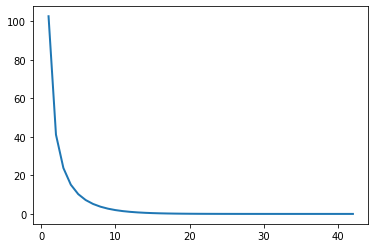

In [156]:
epocas = range(1,len(error_red)+1,1)

plt.plot(epocas, error_red, lw=2)
plt.show()

Se aprecia que el error disminuye de manera considerable en las primeras 10 épocas de entrenamiento.

**No he incluido la gráfica de la precisión, debido a que deseo que se oberve de manera cruda el vector de predicción. Si incluyera la gráfica de predicción, tendría que redondear el vector de predicción para tener una idea clara de la salida que la red neuronal esta infiriendo y para este caso, ese no es el objetivo.**

***

**DATOS EXTRA A TENER EN CUENTA:**

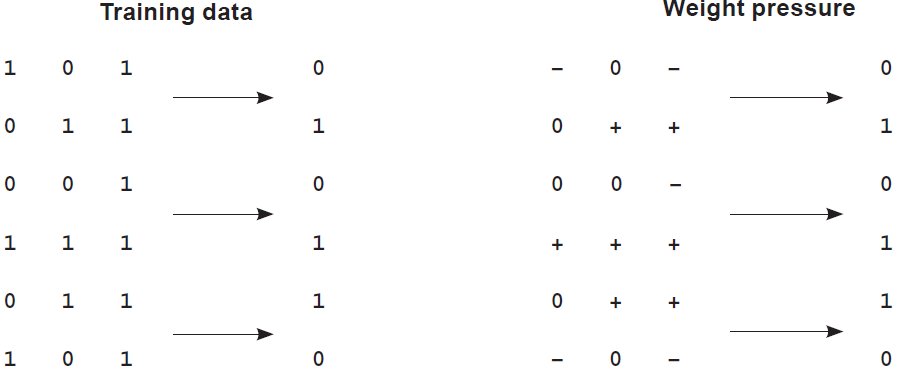

In [157]:
cuadro_casos = Image.open("Streetlights_representacion_cuadros.PNG")
cuadro_casos

*El signo menos (-) significa decremento, mientras que el signo más (+) significa incremento.*

Si analizamos de manera detallada, veremos que de acuerdo a la salida deseada los pesos sufren incrementos o decrementos. Sabemos que la correlación directa entre la entrada y la salida deseada se encuentra en el segundo peso. Sin embargo, en el cuadro derecho (weight pressure), se aprecia igual cantidad de incrementos como decrementos para el 3er peso, lo que significa que este no esta aportando nada en abosoluto. Este tipo de pesos contribuyen al ruido en la señal de error de la red. Por otro lado, el primer peso tiene mayor cantidad de decrementos que incrementos (2 decrementos y 1 incremento), lo que significa que (aunque pequeño), contribuye de manera escaza a minimizar el error.

**Para aquellos pesos en cualquier otra red neuronal que se encuentren en la situación del 3er peso (no aportan nada en absoluto al aprendizaje de la red), existe algo llamado <font color="green">REGULARIZACIÓN</font>, *la cual forza a los pesos a moverse hacia un valor nulo, es decir, 0.***

***

<font color="blue">**Cuando no existe correlación entre el conjunto de entrada y el de salida, se debe aumentar la complejidad de la red, es decir, se añaden capas y/o neuronas a la arquitectura de red. De lo contrario, la error nunca será 0 o aproximado a 0 lo que se traduce en un pésimo aprendizaje de la red.**</font>